In [885]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import time

In [886]:
cd '/Users/jethrolong/Desktop/NTU summer/EE4483 Aritificial Intelligence and Data mining/Project/dataset'

/Users/jethrolong/Desktop/NTU summer/EE4483 Aritificial Intelligence and Data mining/Project/dataset


In [887]:
ls

7.15 submission/        submission_3.numbers*   submission_8.csv
submission_1.csv        submission_4.csv        submission_8.numbers*
submission_10.csv       submission_4.numbers*   submission_9.csv
submission_11.csv       submission_5.csv        submission_9.numbers*
submission_12.csv       submission_5.numbers*   test(1).csv
submission_13.csv       submission_6.csv        test.csv
submission_2 2.numbers* submission_6.numbers*   test_v2.csv
submission_2.csv        submission_7.csv        train.csv
submission_3.csv        submission_7.numbers*   train_v2.csv


In [1005]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Count Null Value

In [1006]:
# data.isnull().sum().sort_values(ascending=False)
count = train_data.shape[0]
percentage = percentage = round(train_data.isnull().sum()/count * 100, 2).sort_values(ascending=False)
missing_vals = pd.concat([train_data.isnull().sum().sort_values(ascending=False), percentage], axis=1, keys=['Null Value Count', 'Percentage %'])
missing_vals

,Null Value Count,Percentage %
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [1007]:
count = test_data.shape[0]
percentage = percentage = round(test_data.isnull().sum()/count * 100, 2).sort_values(ascending=False)
missing_vals = pd.concat([test_data.isnull().sum().sort_values(ascending=False), percentage], axis=1, keys=['Null Value Count', 'Percentage %'])
missing_vals

,Null Value Count,Percentage %
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


# Pop off meaningless columns

In [1008]:
train_df = train_data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)
test_df = test_data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)

In [1009]:
dataset = [train_df, test_df]
dataset

[     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
 0           0       3    male  22.0      1      0    7.2500        S
 1           1       1  female  38.0      1      0   71.2833        C
 2           1       3  female  26.0      0      0    7.9250        S
 3           1       1  female  35.0      1      0   53.1000        S
 4           0       3    male  35.0      0      0    8.0500        S
 5           0       3    male   NaN      0      0    8.4583        Q
 6           0       1    male  54.0      0      0   51.8625        S
 7           0       3    male   2.0      3      1   21.0750        S
 8           1       3  female  27.0      0      2   11.1333        S
 9           1       2  female  14.0      1      0   30.0708        C
 10          1       3  female   4.0      1      1   16.7000        S
 11          1       1  female  58.0      0      0   26.5500        S
 12          0       3    male  20.0      0      0    8.0500        S
 13          0      

# Filling Age

In [1010]:
for each in dataset:
    avg_age = each['Age'].mean()
    std_age = each['Age'].std()
    age_null_count = each['Age'].isnull().sum()
    random_fill = np.random.randint(avg_age-std_age, avg_age+std_age, size=age_null_count)
    temp_df_copy = each['Age'].copy()
    temp_df_copy[np.isnan(temp_df_copy)] = random_fill
    each['Age'] = temp_df_copy.astype(int)

In [1011]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
5,0,3,male,40,0,0,8.4583,Q
6,0,1,male,54,0,0,51.8625,S
7,0,3,male,2,3,1,21.0750,S
8,1,3,female,27,0,2,11.1333,S
9,1,2,female,14,1,0,30.0708,C


In [1012]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S
5,3,male,14,0,0,9.2250,S
6,3,female,30,0,0,7.6292,Q
7,2,male,26,1,1,29.0000,S
8,3,female,18,0,0,7.2292,C
9,3,male,21,2,0,24.1500,S


# Fare filling

In [1013]:
for each in dataset:
    fare_null_count = each['Fare'].isnull().sum()
    if fare_null_count > 0:
        avg_fare = each['Fare'].mean()
        std_fare = each['Fare'].std()
        random_fill = np.random.randint(avg_fare-std_fare, avg_fare+std_fare, size=fare_null_count)
        temp_df_copy = each['Fare'].copy()
        temp_df_copy[np.isnan(temp_df_copy)] = random_fill
        each['Fare'] = temp_df_copy.astype(float)

In [1014]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Filling Embarked

In [1015]:
df['Embarked'].describe()

count    891.000000
mean       1.361392
std        0.635673
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Embarked, dtype: float64

In [1016]:
for each in dataset:
    majority = each['Embarked'].value_counts().index.tolist()[0]
    each['Embarked'] = each['Embarked'].fillna(majority)

In [1017]:
for each in dataset:
    print(each['Embarked'].isnull().sum())

0
0


In [1019]:
dataset[1].to_csv('/Users/jethrolong/Desktop/test_impute.csv', index=False)

# Feature Standardization

In [901]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [902]:
# Sex Mapping
sex_dict = {"male":1, "female":2}
for each in dataset:
    each['Sex'] = each['Sex'].map(sex_dict)

In [903]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,2,38,1,0,71.2833,C
2,1,3,2,26,0,0,7.9250,S
3,1,1,2,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S
5,0,3,1,36,0,0,8.4583,Q
6,0,1,1,54,0,0,51.8625,S
7,0,3,1,2,3,1,21.0750,S
8,1,3,2,27,0,2,11.1333,S
9,1,2,2,14,1,0,30.0708,C


In [904]:
# Embarked mapping
embark_map = {"S":1, "C":2, "Q":3}
for each in dataset:
    each['Embarked'] = each['Embarked'].map(embark_map)

In [905]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,1
1,1,1,2,38,1,0,71.2833,2
2,1,3,2,26,0,0,7.9250,1
3,1,1,2,35,1,0,53.1000,1
4,0,3,1,35,0,0,8.0500,1
5,0,3,1,36,0,0,8.4583,3
6,0,1,1,54,0,0,51.8625,1
7,0,3,1,2,3,1,21.0750,1
8,1,3,2,27,0,2,11.1333,1
9,1,2,2,14,1,0,30.0708,2


In [906]:
df['Age'].describe()

count    891.000000
mean       1.951740
std        0.757676
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Age, dtype: float64

In [907]:
# Age Grouping -- categorize
for each in dataset:
    each.loc[each['Age'] <= 22, 'Age'] = 1
    each.loc[(22 < each['Age']) & (each['Age'] <= 30), 'Age'] = 2
#     each.loc[(28 < each['Age']) & (each['Age'] <= 30), 'Age'] = 3
    each.loc[(30 < each['Age']) & (each['Age'] <= 33), 'Age'] = 3
    each.loc[each['Age'] > 33, 'Age'] = 4
    each['Age'].value_counts()
    
# Age Normalization
# for each in dataset:
#     mean_age = each['Age'].mean()
#     range_age = each['Age'].max() - each['Age'].min()
#     each['Age'] = round((each['Age'] - mean_fare)/range_age + 1, 2)


In [908]:
train_df['Age'].value_counts()


4    307
1    287
2    230
3     67
Name: Age, dtype: int64

In [909]:
df['Fare'].describe()

count    891.000000
mean       0.999540
std        0.097282
min        0.940000
25%        0.950000
50%        0.970000
75%        1.000000
max        1.940000
Name: Fare, dtype: float64

In [910]:
# Fare Scaling -- mean normalization
# for each in dataset:
#     mean_fare = each['Fare'].mean()
#     range_fare = each['Fare'].max() - each['Fare'].min()
#     each['Fare'] = round((each['Fare'] - mean_fare)/range_fare + 1, 2)
    
    
# Age Grouping -- categorize
for each in dataset:
    each.loc[each['Fare'] <= 7.91, 'Fare'] = 1
    each.loc[(7.91 < each['Fare']) & (each['Fare'] <= 14.46), 'Fare'] = 2
    each.loc[(14.46 < each['Fare']) & (each['Fare'] <= 31.14), 'Fare'] = 3
#     each.loc[(30 < each['Fare']) & (each['Fare'] <= 40), 'Fare'] = 4
    each.loc[each['Fare'] > 31.14, 'Fare'] = 4
    each['Fare'] = each['Fare'].copy().astype(int)
    each['Fare'].value_counts()
    

In [911]:
dataset[0].to_csv('/Users/jethrolong/Desktop/train_v2.csv', index=False)
dataset[1].to_csv('/Users/jethrolong/Desktop/test_v2.csv', index=False)

In [912]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,4,0,0,1,3
1,3,2,4,1,0,1,1
2,2,1,4,0,0,2,3
3,3,1,2,0,0,2,1
4,3,2,1,1,1,2,1
5,3,1,1,0,0,2,1
6,3,2,2,0,0,1,3
7,2,1,2,1,1,3,1
8,3,2,1,0,0,1,2
9,3,1,1,2,0,3,1


In [913]:
train_X = pd.read_csv('/Users/jethrolong/Desktop/train_v2.csv').drop(['Survived'], axis=1).to_numpy().T
train_y = pd.read_csv('/Users/jethrolong/Desktop/train_v2.csv')['Survived'].to_numpy()
train_y = np.expand_dims(train_y, axis=1).T
m_train = train_X.shape[1]
num_input_unit = train_X.shape[0]

test_X = pd.read_csv('/Users/jethrolong/Desktop/test_v2.csv').to_numpy().T


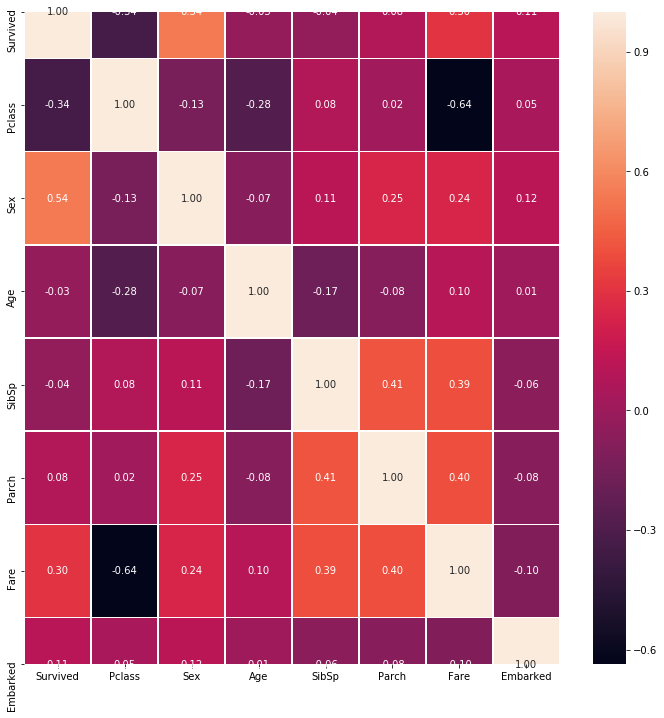

In [994]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)


In [915]:
print ("Number of training examples: m_train = " + str(m_train))
print ("input layer size = " + str(num_input_unit))
print ("train_X shape: " + str(train_X.shape))
print ("train_y shape: " + str(train_y.shape))
print ("Test_X shape: " + str(test_X.shape))

Number of training examples: m_train = 891
input layer size = 7
train_X shape: (7, 891)
train_y shape: (1, 891)
Test_X shape: (7, 418)


##  Building the parts of our algorithm ## 

Follow the Deep Learning methodology to build the model:

    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels
    
## 5 - L-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

### Prediction Function

In [916]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2  # number of layers in the neural network
    p = np.zeros((1, m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0

    if y is not None:  # Evaluation
        # print results
        print("predictions: " + str(p))
        print("true labels: " + str(y))
        print("Accuracy: " + str(np.sum((p == y) / m)))
    else:
        print("predictions: " + str(p))
        
    return p

In [917]:
# helper function

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ



def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(int(time.time()))
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

# Forward Propagation

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [918]:
# linear forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = np.dot(W, A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


# linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A=A_prev, W=W, b=b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A=A_prev, W=W, b=b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache
  
    
# L_model_forward
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)],"relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))     
    return AL, caches   
    
    
# Cost Function
def compute_cost(AL, Y):
    """
    Implement the cost function

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -1.0/m * np.sum(Y * np.log(AL) + (1 - Y)* np.log(1-AL))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost


# Linear Backward
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db


# Linear activation backward
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db



# L_model_backward
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache,activation='sigmoid')
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads


# update parameters
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate*grads['dW'+str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate*grads['db'+str(l+1)]
    return parameters

In [919]:
# L_Layer model

def L_layer_model(X, Y, layer_dims, learning_rate = 0.003, num_iterations = 10000, print_cost=False): 
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_input_unit)
    Y -- true "label" vector (containing 0 if not-survived, 1 if survived), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    parameters =initialize_parameters_deep(layer_dims=layer_dims)  # initialize paras
    
    # Loop (Gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters=parameters)
    
        # Compute cost.
        cost = compute_cost(AL=AL, Y=Y)
    
        # Backward propagation.
        grads = L_model_backward(AL=AL, caches=caches,Y=Y)
 
        # Update parameters.
        parameters = update_parameters(grads=grads, learning_rate=learning_rate, parameters=parameters)
        
        # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per thousand)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

X shape:  (7, 891)
y shape:  (1, 891)
Cost after iteration 0: 0.778617
Cost after iteration 1000: 0.415073
Cost after iteration 2000: 0.382324
Cost after iteration 3000: 0.370735
Cost after iteration 4000: 0.354631
Cost after iteration 5000: 0.358120
Cost after iteration 6000: 0.346796
Cost after iteration 7000: 0.310810
Cost after iteration 8000: 0.321332
Cost after iteration 9000: 0.299103
Cost after iteration 10000: 0.324515
Cost after iteration 11000: 0.275148
Cost after iteration 12000: 0.278400
Cost after iteration 13000: 0.266327
Cost after iteration 14000: 0.264261
Cost after iteration 15000: 0.260244
Cost after iteration 16000: 0.258722
Cost after iteration 17000: 0.256860
Cost after iteration 18000: 0.281622
Cost after iteration 19000: 0.254934
Cost after iteration 20000: 0.254734
Cost after iteration 21000: 0.256036
Cost after iteration 22000: 0.263077
Cost after iteration 23000: 0.257727
Cost after iteration 24000: 0.256979
Cost after iteration 25000: 0.253908
Cost after it

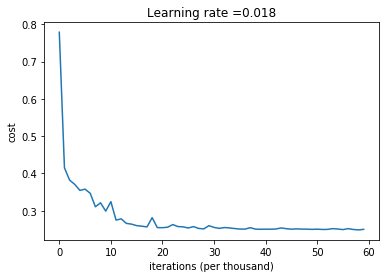

In [988]:
## 7-Layer Model ##
layer_dims = [num_input_unit, 35,35,35,35, 35, 1]
print('X shape: ', train_X.shape)
print('y shape: ', train_y.shape)
paras = L_layer_model(train_X, train_y, layer_dims=layer_dims, learning_rate= 0.018, num_iterations=60000, print_cost=True)

In [854]:
for k,v in paras.items():
    print(k)
    print(v.shape)


W1
(35, 7)
b1
(35, 1)
W2
(35, 35)
b2
(35, 1)
W3
(35, 35)
b3
(35, 1)
W4
(7, 35)
b4
(7, 1)
W5
(1, 7)
b5
(1, 1)


# Evaluation


In [1003]:
evaluation = predict(train_X, train_y, parameters=read_model)

predictions: [[0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
  1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
  1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
  1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
  0. 0. 0. 1. 1. 1. 0. 0.

In [856]:
import pickle

In [1002]:
# with open('/Users/jethrolong/Desktop/Model_88.55%', 'wb') as f:
#     model = pickle.dump(paras, f, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/jethrolong/Desktop/Model_88.88%', 'rb') as file:
    read_model = pickle.load(file)

# Prediction

In [1004]:
pre = predict(test_X, None, parameters=read_model)

predictions: [[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
  1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
  0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
  0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 1. 0. 1. 0. 0. 0. 0.

In [973]:
pre.shape

(1, 418)

In [982]:
test_data['Survived'] = pd.DataFrame(pre.T, dtype=np.int)

In [873]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [983]:
submission = pd.concat([test_data['PassengerId'], test_data['Survived']], axis=1)

In [984]:
submission.to_csv("/Users/jethrolong/Desktop/NTU summer/EE4483 Aritificial Intelligence and Data mining/Project/dataset/submission_19.csv", index=False)

In [876]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [865]:
sigmoid(0.8)

(0.6899744811276125, 0.8)

In [866]:
0.690*0.3

0.207

In [867]:
sigmoid(0.207)

(0.5515660020600744, 0.207)

In [868]:
0.534*(1-0.534)*-0.534

-0.13288269600000002

In [869]:
0.552*(1-0.552)*(1-0.552)

0.11078860799999998